In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [2]:
# load pre-processed data
data_dir = os.path.expanduser('../dataFiles/')
sub = pd.read_csv(data_dir + 'autobioMem_sub.csv')
subDate_all = pd.read_csv(data_dir + 'autobioMem_subDate.csv')
earlyRecall = pd.read_csv(data_dir + 'autobioMem_earlyRecall.csv')

In [3]:
# subset by months 
months = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"]
subDate = subDate_all[subDate_all['datePlot'].isin(months)]

# individual sets 
sd_2020 = subDate[subDate['set']=='2020'] # 2020 memory Dec 2020
sd_2020_p1 = subDate[subDate['set']=='2020+1'] # 2020 memory on year later
sd_2020_p2 = subDate[subDate['set']=='2020+2'] # 2020 memory two years later
sd_2020_p2_r = subDate[subDate['set']=='2020+2_rep'] # 2020 memory two years later, replication in new sample
sd_2021 = subDate[subDate['set']=='2021'] # 2021 memory Dec 2021 

In [4]:
# subsets

# main versus replicated samples (2 yrs later)
sd_comp = subDate[subDate['set'].isin(['2020+2','2020+2_rep'])]

# main sample 
subDate = subDate[~(subDate['set']=='2020+2_rep')]
subDate['set'] = subDate['set'].astype(pd.CategoricalDtype(['2020','2020+1','2020+2','2021'])) # set order

## greater autobiographical memory for march 2020 (pandemic onset) across three years/march 2020 memory contained more negative content that predicted greater recall (Fig. 2A-B)

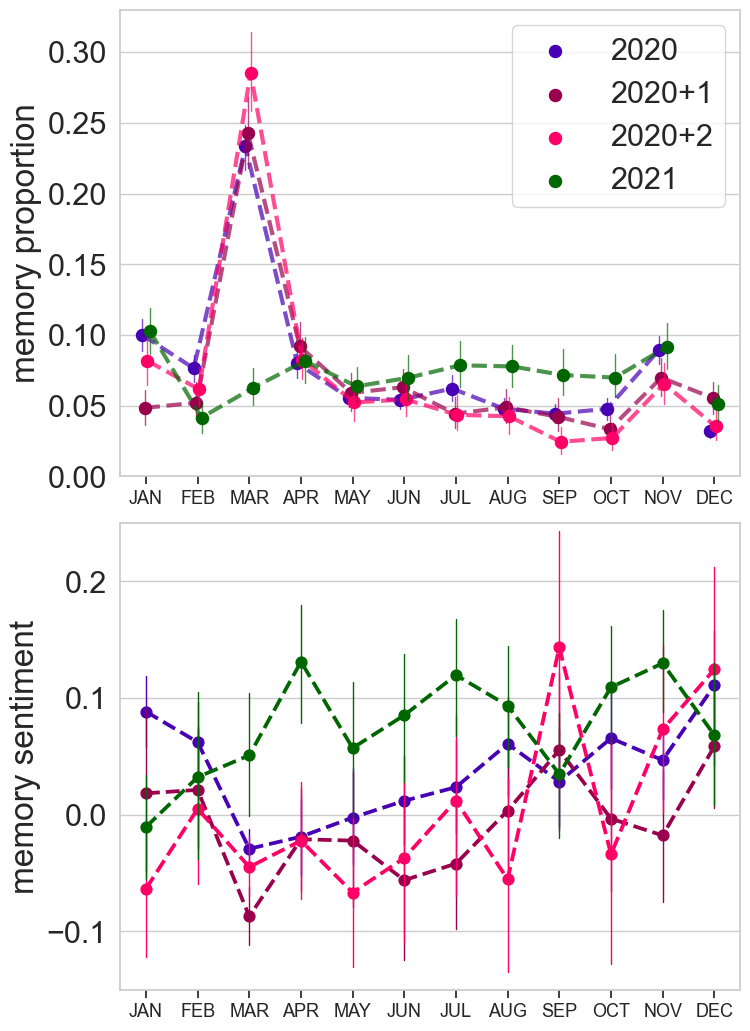

In [6]:
fig, (ax1,ax2)= plt.subplots(nrows = 2, ncols=1, figsize=(8,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.1, wspace=0.4)
sns.set_theme(style="whitegrid", font_scale=2, rc={'xtick.bottom': True})

handles, labels = ax1.get_legend_handles_labels()

# memory proportion
p1 = sns.pointplot(x="datePlot", y="memProp", hue="set",dodge=0.15,errwidth=1,palette=["#4700b3","#99004d","#ff0066","#006600"],scale=1.1,linestyles = ['--','--','--','--'],
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"],
                data=subDate, ax = ax1)

# remove line between november and december when memory for that year was recalled early december 
x1 = p1.lines[0].get_xdata()
y1 = p1.lines[0].get_ydata()
x1 = x1[0:11]
y1 = y1[0:11]
p1.lines[0].set_xdata(x1)
p1.lines[0].set_ydata(y1)
x4 = p1.lines[39].get_xdata()
y4 = p1.lines[39].get_ydata()
x4 = x4[0:11]
y4 = y4[0:11]
p1.lines[39].set_xdata(x4)
p1.lines[39].set_ydata(y4)

p1.set_xlabel("");
p1.set_ylabel("memory proportion");
ax1.set(ylim=(0, 0.33));
ax1.legend(handles=handles[0:], labels=labels[0:]);
plt.setp(ax1.get_xticklabels(), fontsize=13);

for line in ax1.lines:
    line.set_alpha(0.7)

# sentiment     
p2 = sns.pointplot(x="datePlot", y="compound", hue="set",errwidth=1,palette=["#4700b3","#99004d","#ff0066","#006600"],linestyles = ['--','--','--','--'],
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"],
                data=subDate, ax = ax2)
p2.set_xlabel("");
p2.set_ylabel("memory sentiment");
ax2.set(ylim=(-0.15, 0.25));
ax2.get_legend().remove();
plt.setp(ax2.get_xticklabels(), fontsize=13);

plt.savefig('figRedone.pdf',bbox_inches='tight')

### 2020+2 years versus replication sample (SI Appendix Fig. S3 A-B)

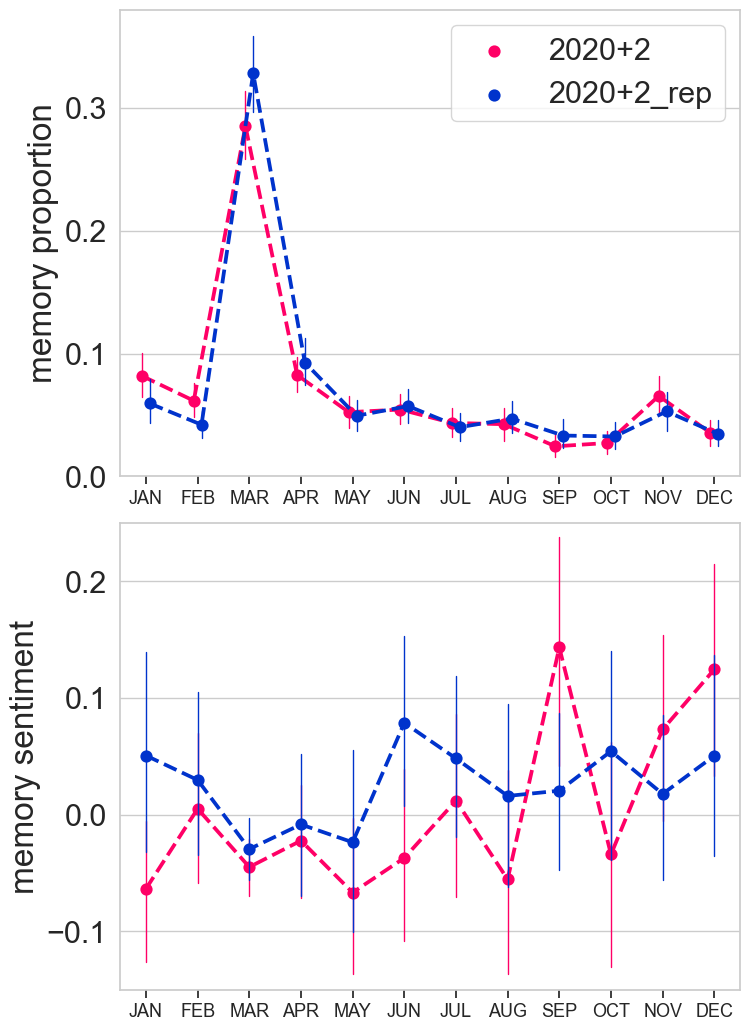

In [9]:
fig, (ax1,ax2)= plt.subplots(nrows = 2, ncols=1, figsize=(8,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.1, wspace=0.4)
sns.set_theme(style="whitegrid", font_scale=2, rc={'xtick.bottom': True})

handles, labels = ax1.get_legend_handles_labels()

p1 = sns.pointplot(x="datePlot", y="memProp", hue="set",dodge=0.15,errwidth=1,palette=["#ff0066","#0033cc"],scale=1,linestyles = ['--','--'],
                 order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"],
                data=sd_comp, ax = ax1)

p1.set_xlabel("");
p1.set_ylabel("memory proportion");
ax1.set(ylim=(0, 0.38));
ax1.legend(handles=handles[0:], labels=labels[0:]);
plt.setp(ax1.get_xticklabels(), fontsize=13);

p2 = sns.pointplot(x="datePlot", y="compound", hue="set",errwidth=1,palette=["#ff0066","#0033cc"],scale=1,linestyles = ['--','--'],
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"],
                data=sd_comp, ax = ax2)
p2.set_xlabel("");
p2.set_ylabel("memory sentiment");
ax2.set(ylim=(-0.15, 0.25));
ax2.get_legend().remove();
plt.setp(ax2.get_xticklabels(), fontsize=13);

## earlier recall of march 2020 memory (Fig. 2C)

In [26]:
# prepare for plotting
earlyRecall_2020 = earlyRecall[earlyRecall['year']=='set_2020']
earlyRecall_2020_p1 = earlyRecall[earlyRecall['year']=='set_2020_+1']
earlyRecall_2020_p2 = earlyRecall[earlyRecall['year']=='set_2020_+2']
earlyRecall_2021 = earlyRecall[earlyRecall['year']=='set_2021']

earlyRecall_2020 = pd.melt(earlyRecall_2020, id_vars=['datePlot'], value_vars=["average","first recall","second recall","third recall"])
earlyRecall_2020_p1 = pd.melt(earlyRecall_2020_p1, id_vars=['datePlot'], value_vars=["average","first recall","second recall","third recall"])
earlyRecall_2020_p2 = pd.melt(earlyRecall_2020_p2, id_vars=['datePlot'], value_vars=["average","first recall","second recall","third recall"])
earlyRecall_2021 = pd.melt(earlyRecall_2021, id_vars=['datePlot'], value_vars=["average","first recall","second recall","third recall"])

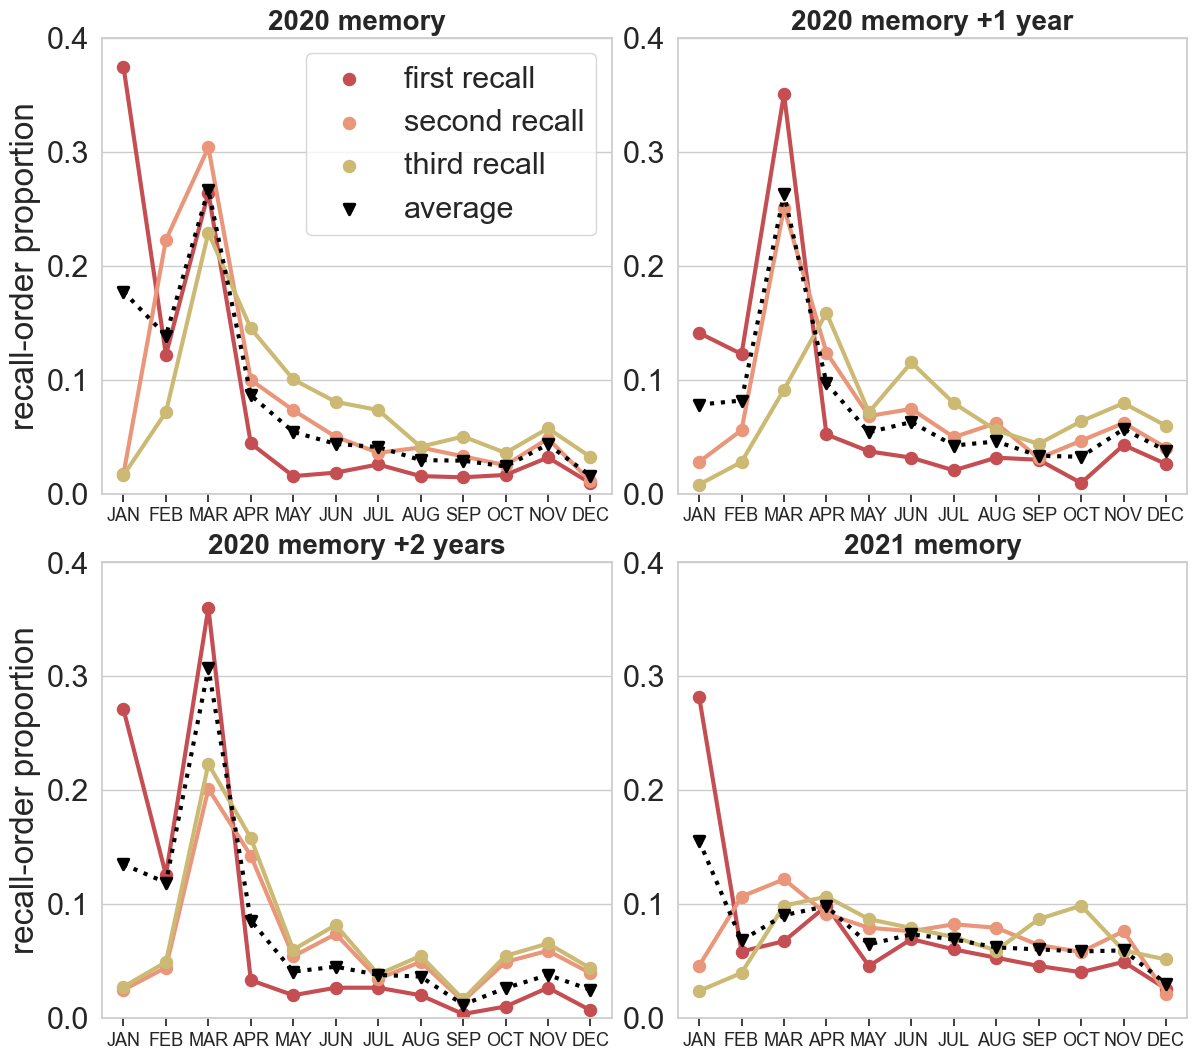

In [79]:
# plot
fig, ((ax1,ax2),(ax3,ax4))= plt.subplots(nrows = 2, ncols=2, figsize=(14,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.15, wspace=0.13)
sns.set_theme(style="whitegrid", font_scale=2, rc={'xtick.bottom': True})

p1 = sns.pointplot(x="datePlot", y="value",hue="variable", markers=['o', 'o', 'o', 'v'], scale=1.1, linestyles = ['-', '-', '-', ':'],
                hue_order = ["first recall","second recall","third recall","average"], palette=['r','#E9967A','y','#000000'],
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"],
                data=earlyRecall_2020, ax  = ax1)
p1.set_title('2020 memory',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
p1.set_xlabel("");
p1.set_ylabel("recall-order proportion");
plt.setp(ax1.get_xticklabels(), fontsize=13);
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles[0:], labels=labels[0:]);
ax1.set(ylim=(0, 0.4));

p2 = sns.pointplot(x="datePlot", y="value", hue="variable", markers=['o', 'o', 'o', 'v'], scale=1.1, linestyles = ['-', '-', '-', ':'],
                hue_order = ["first recall","second recall","third recall","average"], palette=['r','#E9967A','y','#000000'],
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"],
                data=earlyRecall_2020_p1, ax  = ax2)
p2.set_title('2020 memory +1 year',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
p2.set_xlabel("");
p2.set_ylabel("");
ax2.set(ylim=(0, 0.4));
plt.setp(ax2.get_xticklabels(), fontsize=13);
ax2.get_legend().remove();

p3 = sns.pointplot(x="datePlot", y="value",hue="variable", markers=['o', 'o', 'o', 'v'], scale=1.1, linestyles = ['-', '-', '-', ':'],
                hue_order = ["first recall","second recall","third recall","average"], palette=['r','#E9967A','y','#000000'],
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"],
                data=earlyRecall_2020_p2, ax  = ax3)
p3.set_title('2020 memory +2 years',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
p3.set_xlabel("");
p3.set_ylabel("recall-order proportion");
ax3.get_legend().remove();
ax3.set(ylim=(0, 0.4));
plt.setp(ax3.get_xticklabels(), fontsize=13);

p4 = sns.pointplot(x="datePlot", y="value",hue="variable", markers=['o', 'o', 'o', 'v'], scale=1.1, linestyles = ['-', '-', '-', ':'],
                hue_order = ["first recall","second recall","third recall","average"], palette=['r','#E9967A','y','#000000'],
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"],
                data=earlyRecall_2021, ax  = ax4)
p4.set_title('2021 memory',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
p4.set_xlabel("");
p4.set_ylabel("");
ax4.get_legend().remove();
ax4.set(ylim=(0, 0.4));
plt.setp(ax4.get_xticklabels(), fontsize=13);

### 2020+2 years versus replication sample (SI Appendix Fig. S3 C)

In [219]:
# supplemental comparison
earlyRecall_2020_rep = earlyRecall[earlyRecall['year']=='set_2020_+2_rep']
earlyRecall_2020_rep = pd.melt(earlyRecall_2020_rep, id_vars=['datePlot'], value_vars=["average","first recall","second recall","third recall"])

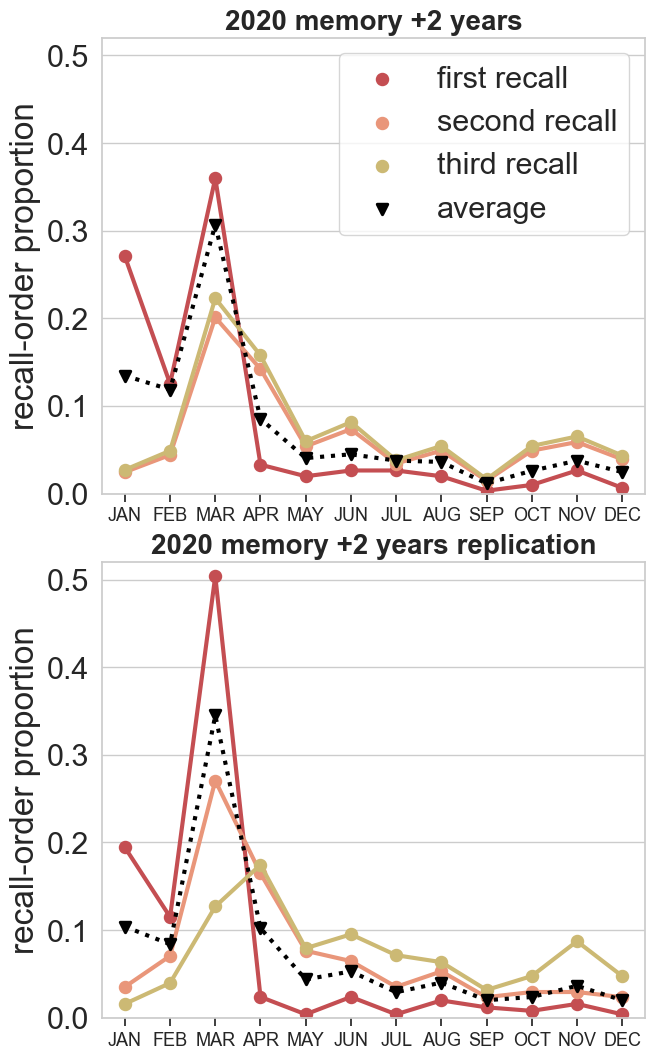

In [224]:
fig, (ax1,ax2)= plt.subplots(nrows = 2, ncols=1, figsize=(7,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.15, wspace=0.13)
sns.set_theme(style="whitegrid", font_scale=2, rc={'xtick.bottom': True})

p1 = sns.pointplot(x="datePlot", y="value",hue="variable", markers=['o', 'o', 'o', 'v'], scale=1.1, linestyles = ['-', '-', '-', ':'],
                hue_order = ["first recall","second recall","third recall","average"], palette=['r','#E9967A','y','#000000'],
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"],
                data=earlyRecall_2020_p2, ax  = ax1)
p1.set_title('2020 memory +2 years',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
p1.set_xlabel("");
p1.set_ylabel("recall-order proportion");
#p1.set_xticks([])
plt.setp(ax1.get_xticklabels(), fontsize=13);
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles[0:], labels=labels[0:]);
ax1.set(ylim=(0, 0.52));

p2 = sns.pointplot(x="datePlot", y="value", hue="variable", markers=['o', 'o', 'o', 'v'], scale=1.1, linestyles = ['-', '-', '-', ':'],
                hue_order = ["first recall","second recall","third recall","average"], palette=['r','#E9967A','y','#000000'],
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC"],
                data=earlyRecall_2020_rep, ax  = ax2)
p2.set_title('2020 memory +2 years replication',fontdict= { 'fontsize': 20, 'fontweight':'bold'})
p2.set_ylabel("recall-order proportion");
p2.set_xlabel("");
#p2.set_xticks([])
ax2.set(ylim=(0, 0.52));
plt.setp(ax2.get_xticklabels(), fontsize=13);
ax2.get_legend().remove();

## negative affect increased likelihood of later retrieving that month (Fig. 3A-D)

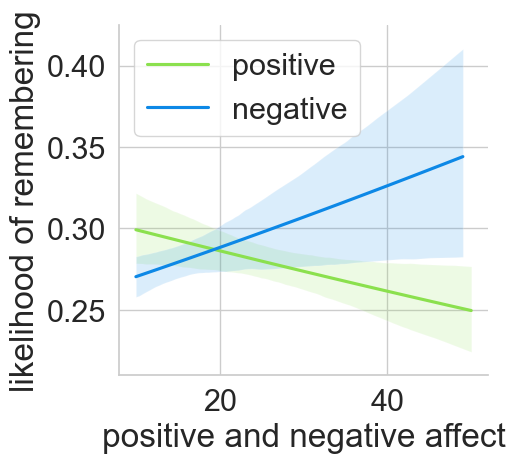

In [5]:
# PANAS - change frame 
df_PANAS = subDate[["lik_2020","monthly_PANAS_pos","monthly_PANAS_neg"]]
df_PANAS = pd.melt(df_PANAS, id_vars = 'lik_2020', var_name = 'PANAS', value_name = 'values')
df_PANAS['PANAS'] = np.where(df_PANAS['PANAS']=="monthly_PANAS_pos","positive","negative")
df_PANAS = df_PANAS.dropna()


# PANAS 2020 plot (have to plot lmplot separately)
sns.set_theme(style="whitegrid", font_scale=2)
p1 = sns.lmplot(x="values", y="lik_2020", hue="PANAS", logistic=True, data=df_PANAS,scatter = False, height = 5, aspect=1.1,
       palette=dict(positive = '#8be04e', negative = "#0d88e6"),legend=False);
p1.set_axis_labels("positive and negative affect","likelihood of remembering");
p1.set(ylim=(0.21, 0.425));
plt.legend(loc='upper left');

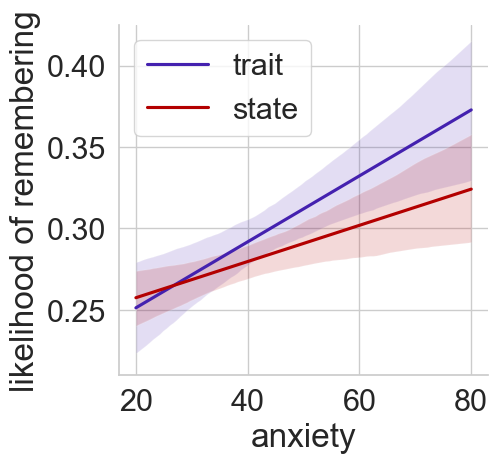

In [6]:
df_STAI = subDate[["lik_2020","monthly_STAI_trait","monthly_STAI_state"]]
df_STAI = pd.melt(df_STAI, id_vars = 'lik_2020', var_name = 'STAI', value_name = 'values')
df_STAI['STAI'] = np.where(df_STAI['STAI']=="monthly_STAI_trait","trait","state")

sns.set_theme(style="whitegrid", font_scale=2)
p1 = sns.lmplot(x="values", y="lik_2020", hue="STAI", data=df_STAI,scatter = False, height = 5, aspect = 1.1, 
       palette=dict(trait = "#4421af", state = "#b30000"),legend=False);
p1.set_axis_labels("anxiety","likelihood of remembering");
p1.set(ylim=(0.21, 0.425));
plt.legend(loc='upper left');

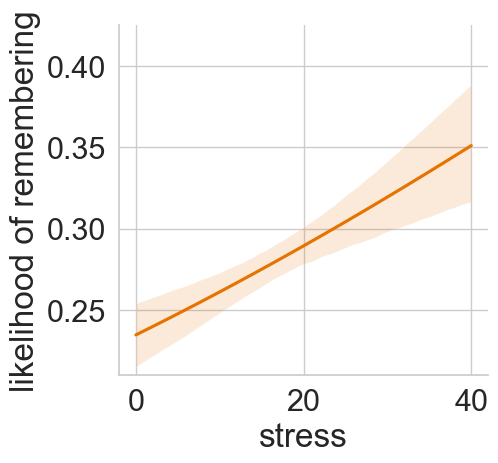

In [7]:
sns.set_theme(style="whitegrid", font_scale=2)
p1 = sns.lmplot(x="monthly_PSS", y="lik_2020",logistic=True,line_kws={'color': "#e67300"},data=subDate,scatter = False, height = 5, aspect = 1.1);
p1.set_axis_labels("stress","likelihood of remembering");
p1.set(ylim=(0.21, 0.425));

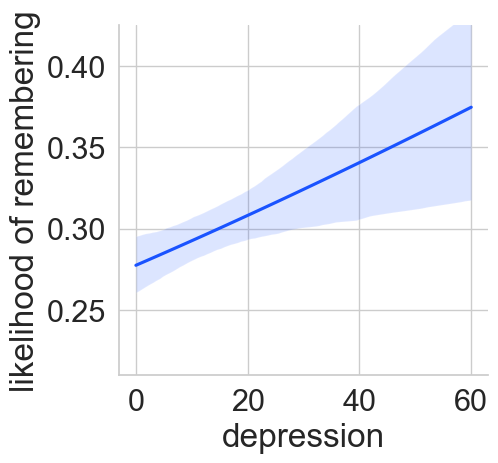

In [8]:
sns.set_theme(style="whitegrid", font_scale=2)
p1 = sns.lmplot(x="monthly_BDI", y="lik_2020", logistic=True,line_kws={'color': '#1a53ff'},data=subDate,scatter = False, height = 5, aspect = 1.1);
p1.set_axis_labels("depression","likelihood of remembering");
p1.set(ylim=(0.21, 0.425));

## affect influenced sentiment of retrieved memory (Fig. 3E-H)

In [9]:
# PANAS - change frame 
df_PANAS = subDate[["compound","monthly_PANAS_pos","monthly_PANAS_neg"]]
df_PANAS = pd.melt(df_PANAS, id_vars = 'compound', var_name = 'PANAS', value_name = 'values')
df_PANAS['PANAS'] = np.where(df_PANAS['PANAS']=="monthly_PANAS_pos","positive","negative")
df_PANAS = df_PANAS.dropna()

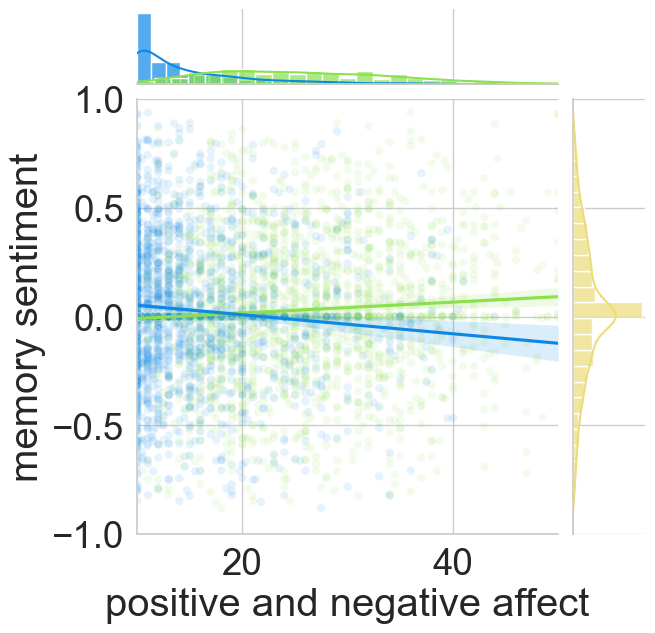

In [10]:
# PANAS 2020 plot (have to plot jointplot separately)
sns.set_theme(style="whitegrid",font_scale=2.4)

p1 = sns.jointplot(x="values", y="compound", data=df_PANAS, hue="PANAS", height=7, alpha = 0.1, palette=dict(positive = '#8be04e', negative = "#0d88e6"),legend=False)
p1.ax_marg_x.set_xlim(10, 50)
p1.ax_marg_y.set_ylim(-1, 1)
# p1.ax_joint.legend(bbox_to_anchor=(1, 1.18), loc='upper left')

sns.histplot(y=df_PANAS['compound'],ax=p1.ax_marg_y,color="#ebdc78",kde=True, alpha=0.7,bins=25)
sns.histplot(df_PANAS.loc[df_PANAS['PANAS']=="negative",'values'],ax=p1.ax_marg_x,color="#0d88e6",kde=True, alpha=0.7,bins=25)
sns.histplot(df_PANAS.loc[df_PANAS['PANAS']=="positive",'values'],ax=p1.ax_marg_x,color="#8be04e",kde=True, alpha=0.7,bins=25)

#for _,gr in df_PANAS.groupby("PANAS"):
    #sns.regplot(x="values", y="compound_2020", data=gr, scatter=False, ax=p1.ax_joint, truncate=False, color=next(colors))
sns.regplot(x="values", y="compound", data=df_PANAS.loc[df_PANAS["PANAS"]=="positive",], scatter=False, ax=p1.ax_joint, truncate=False, color='#8be04e')
sns.regplot(x="values", y="compound", data=df_PANAS.loc[df_PANAS["PANAS"]=="negative",], scatter=False, ax=p1.ax_joint, truncate=False, color='#0d88e6')

p1.set_axis_labels("positive and negative affect","memory sentiment");

In [11]:
# STAI - change frame 
df_STAI = subDate[["compound","monthly_STAI_trait","monthly_STAI_state"]]
df_STAI = pd.melt(df_STAI, id_vars = 'compound', var_name = 'STAI', value_name = 'values')
df_STAI['STAI'] = np.where(df_STAI['STAI']=="monthly_STAI_trait","trait","state")

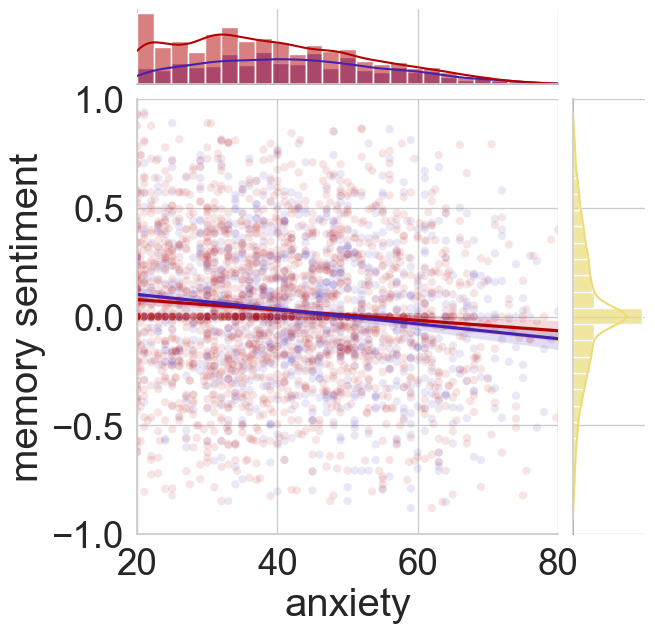

In [12]:
sns.set_theme(style="whitegrid",font_scale=2.4)

p1 = sns.jointplot(x="values", y="compound", data=df_STAI, hue="STAI", height=7, alpha = 0.1, palette=dict(state = "#b30000", trait = "#4421af"),legend=False)
p1.ax_marg_x.set_xlim(20, 80)
p1.ax_marg_y.set_ylim(-1, 1)
#p1.ax_joint.legend(bbox_to_anchor=(1, 1.18), loc='upper left')

sns.histplot(y=df_STAI['compound'],ax=p1.ax_marg_y,color='#ebdc78',kde=True,bins=25,alpha=0.7)
sns.histplot(df_STAI.loc[df_STAI['STAI']=="trait",'values'],ax=p1.ax_marg_x,color="#4421af",kde=True, alpha=0.5,bins=25)
sns.histplot(df_STAI.loc[df_STAI['STAI']=="state",'values'],ax=p1.ax_marg_x,color="#b30000",kde=True, alpha=0.5,bins=25)

#for _,gr in df_PANAS.groupby("PANAS"):
    #sns.regplot(x="values", y="compound_2020", data=gr, scatter=False, ax=p1.ax_joint, truncate=False, color=next(colors))
sns.regplot(x="values", y="compound", data=df_STAI.loc[df_STAI["STAI"]=="state",], scatter=False, ax=p1.ax_joint, truncate=False, color="#b30000")
sns.regplot(x="values", y="compound", data=df_STAI.loc[df_STAI["STAI"]=="trait",], scatter=False, ax=p1.ax_joint, truncate=False, color="#4421af")

p1.set_axis_labels("anxiety","memory sentiment");

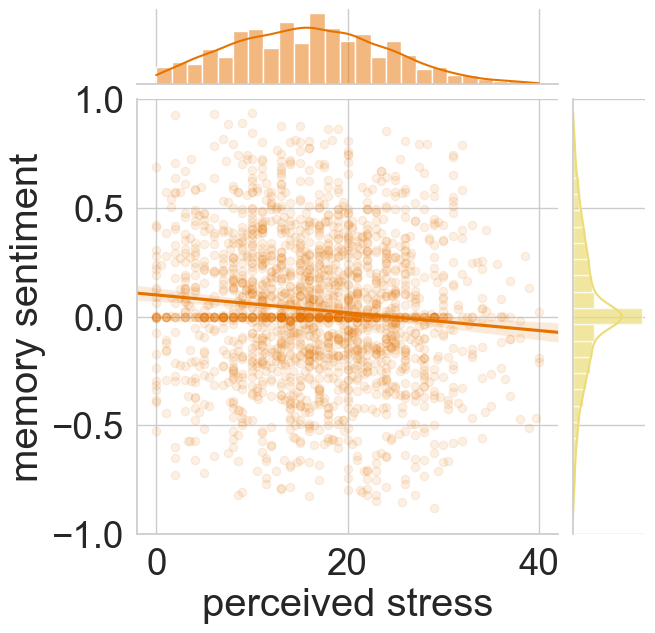

In [13]:
sns.set_theme(style="whitegrid",font_scale=2.4)

p1 = sns.jointplot(x="monthly_PSS", y="compound", data=subDate,
                  kind="reg", truncate=False, color="#e67300", height=7,joint_kws = {'scatter_kws':dict(alpha=0.1)},marginal_kws=dict(bins=25))

p1.ax_marg_y.lines[0].set_color('#ebdc78')

for patch in p1.ax_marg_y.patches:
    patch.set_facecolor('#ebdc78') 
    patch.set_alpha(0.7) 

p1.ax_marg_y.set_ylim(-1, 1)
p1.set_axis_labels("perceived stress","memory sentiment");

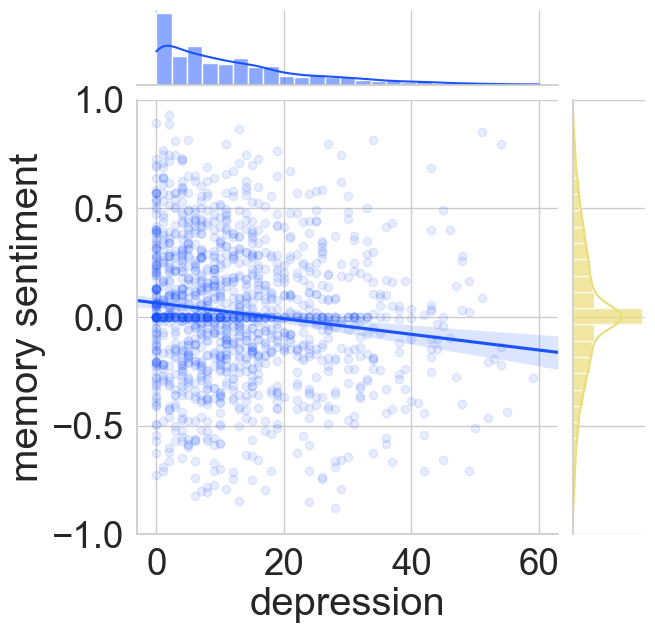

In [15]:
sns.set_theme(style="whitegrid",font_scale=2.4)
p1 = sns.jointplot(x="monthly_BDI", y="compound", data=subDate,
                  kind="reg", truncate=False, color='#1a53ff', height=7,joint_kws = {'scatter_kws':dict(alpha=0.1)},marginal_kws=dict(bins=25))

p1.ax_marg_y.lines[0].set_color('#ebdc78')

for patch in p1.ax_marg_y.patches:
    patch.set_facecolor('#ebdc78') 
    patch.set_alpha(0.7) 

p1.ax_marg_y.set_ylim(-1, 1)
p1.set_axis_labels("depression","memory sentiment");
plt.xticks(range(0, 61, 20));

## six factors predicted the amount and sentiment of recall (Fig. 4A-B)

In [5]:
# create EFA data-frame
df_EFA = sub[["subject","posLow","negSelf","posSelf","negLow","posHigh","negHigh","memCount_total_2020","compound_avg_2020"]]
df_EFA = df_EFA.rename(columns = {'posLow':'pos_lowArousal','negSelf':'neg_self','posSelf':'pos_self','negLow':'neg_lowArousal','posHigh':'pos_highArousal','negHigh':'neg_highArousal'})
df_EFA = pd.melt(df_EFA, id_vars = ['subject','memCount_total_2020','compound_avg_2020'], var_name = 'EFA', value_name = 'values')

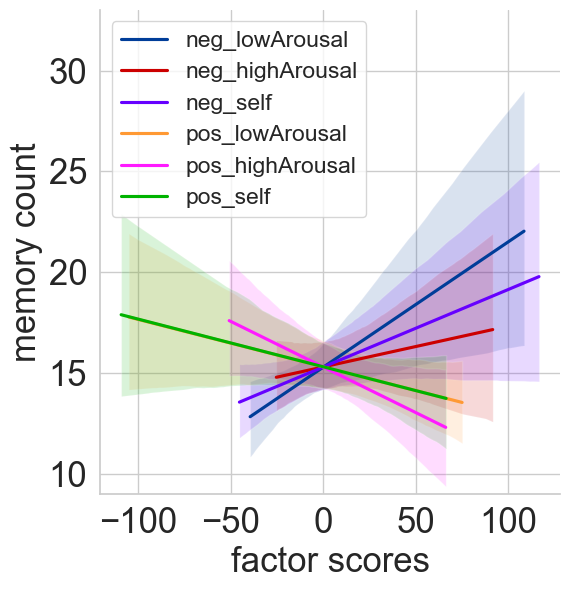

In [6]:
sns.set_theme(style="whitegrid", font_scale=1.5)

p1 = sns.lmplot(x="values", y="memCount_total_2020", hue="EFA", data=df_EFA,scatter = False, height = 6, aspect = 1,
               hue_order=['neg_lowArousal','neg_highArousal','neg_self','pos_lowArousal','pos_highArousal','pos_self'],
               palette=dict(pos_lowArousal = '#ff9933', neg_lowArousal = '#003d99',pos_highArousal='#ff1aff',neg_highArousal='#cc0000',pos_self='#00b300',neg_self='#6600ff'),
               legend=False);
p1.set_axis_labels("factor scores","memory count",fontsize=25);
p1.set(ylim=(9, 33));
plt.yticks(range(10, 35, 5),fontsize=25);
plt.xticks(fontsize=25);
plt.legend(bbox_to_anchor=(0, 1),loc='upper left');

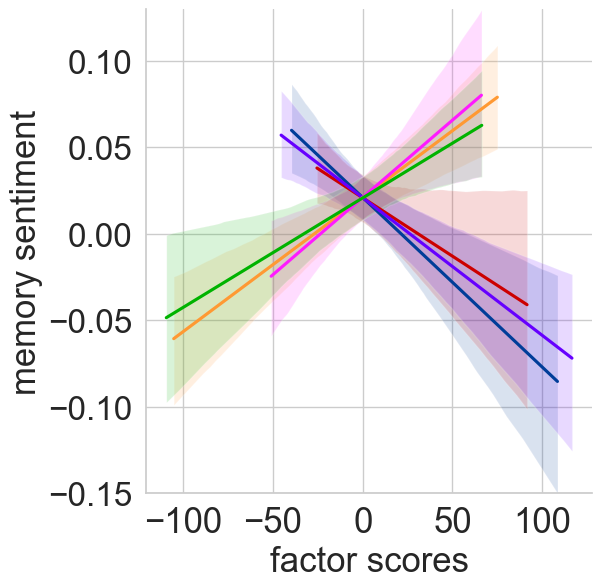

In [15]:
sns.set_theme(style="whitegrid", font_scale=1.5)

p1 = sns.lmplot(x="values", y="compound_avg_2020", hue="EFA", data=df_EFA,scatter = False, height = 6, aspect = 1,
               hue_order=['neg_lowArousal','neg_highArousal','neg_self','pos_lowArousal','pos_highArousal','pos_self'],
               palette=dict(pos_lowArousal = '#ff9933', neg_lowArousal = '#003d99',pos_highArousal='#ff1aff',neg_highArousal='#cc0000',pos_self='#00b300',neg_self='#6600ff'),
               legend=False);
p1.set_axis_labels("factor scores","memory sentiment",fontsize=25);
p1.set(ylim=(-0.15, 0.13));
plt.yticks(np.arange(-0.15, 0.13, 0.05),fontsize=24);
plt.xticks(fontsize=25);

plt.savefig('4B.pdf',bbox_inches='tight')

## PTSD predicted greater and more negative memory, especially for non-episodic details (Fig. 4C-D)

In [9]:
df_PTSD = sub[["subject","intrusion_scaled","avoidance_scaled","neg_cognition_scaled","arousal_scaled",'memCount_total_2020','compound_avg_2020']]
df_PTSD = df_PTSD.rename(columns = {'intrusion_scaled':'intrusion','avoidance_scaled':'avoidance','neg_cognition_scaled':'neg_cognition','arousal_scaled':'arousal'})
df_PTSD = pd.melt(df_PTSD, id_vars = ['subject','memCount_total_2020','compound_avg_2020'], var_name = 'PTSD', value_name = 'values')

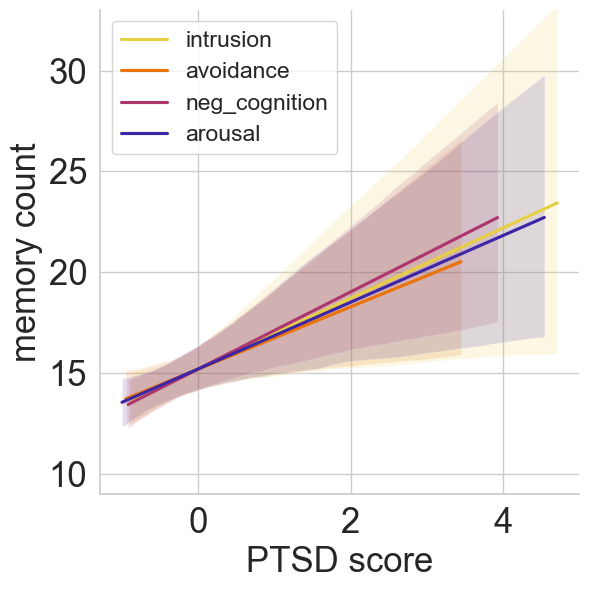

In [19]:
sns.set_theme(style="whitegrid", font_scale=1.5)

p1 = sns.lmplot(x="values", y="memCount_total_2020", hue="PTSD", data=df_PTSD,scatter = False, height = 6, aspect = 1,
               legend=False,palette="CMRmap_r");
p1.set_axis_labels("PTSD score","memory count",fontsize=25);
plt.legend(bbox_to_anchor=(0, 1),loc='upper left');
p1.set(ylim=(9, 33));
plt.yticks(range(10, 35, 5),fontsize=25);
plt.xticks(fontsize=25);

plt.savefig('4C.pdf',bbox_inches='tight')

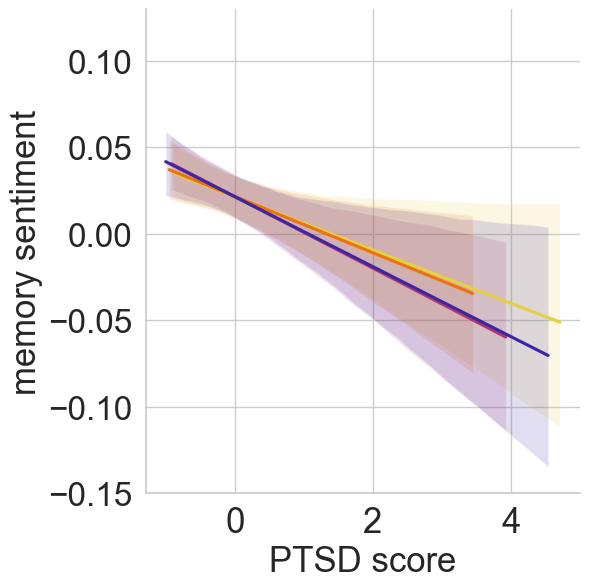

In [20]:
sns.set_theme(style="whitegrid", font_scale=1.5)

p1 = sns.lmplot(x="values", y="compound_avg_2020", hue="PTSD", data=df_PTSD,scatter = False, height = 6, aspect = 1,
               legend=False,palette="CMRmap_r");
p1.set_axis_labels("PTSD score","memory sentiment",fontsize=25);
p1.set(ylim=(-0.15, 0.13));
plt.yticks(np.arange(-0.15, 0.13, 0.05),fontsize=24);
plt.xticks(fontsize=25);

plt.savefig('4D.pdf',bbox_inches='tight')

## distribution of recollections across all possible date options (SI Appendix Fig. S4)

In [204]:
# individual sets from all possible options 
sd_2020A = subDate_all[subDate_all['set']=='2020'] # 2020 memory Dec 2020
sd_2020_p1A = subDate_all[subDate_all['set']=='2020+1'] # 2020 memory one year later
sd_2020_p2A = subDate_all[subDate_all['set']=='2020+2'] # 2020 memory two years later
sd_2020_p2_rA = subDate_all[subDate_all['set']=='2020+2_rep'] # 2020 memory two years later, replication in new sample
sd_2021A = subDate_all[subDate_all['set']=='2021'] # 2021 memory Dec 2021 

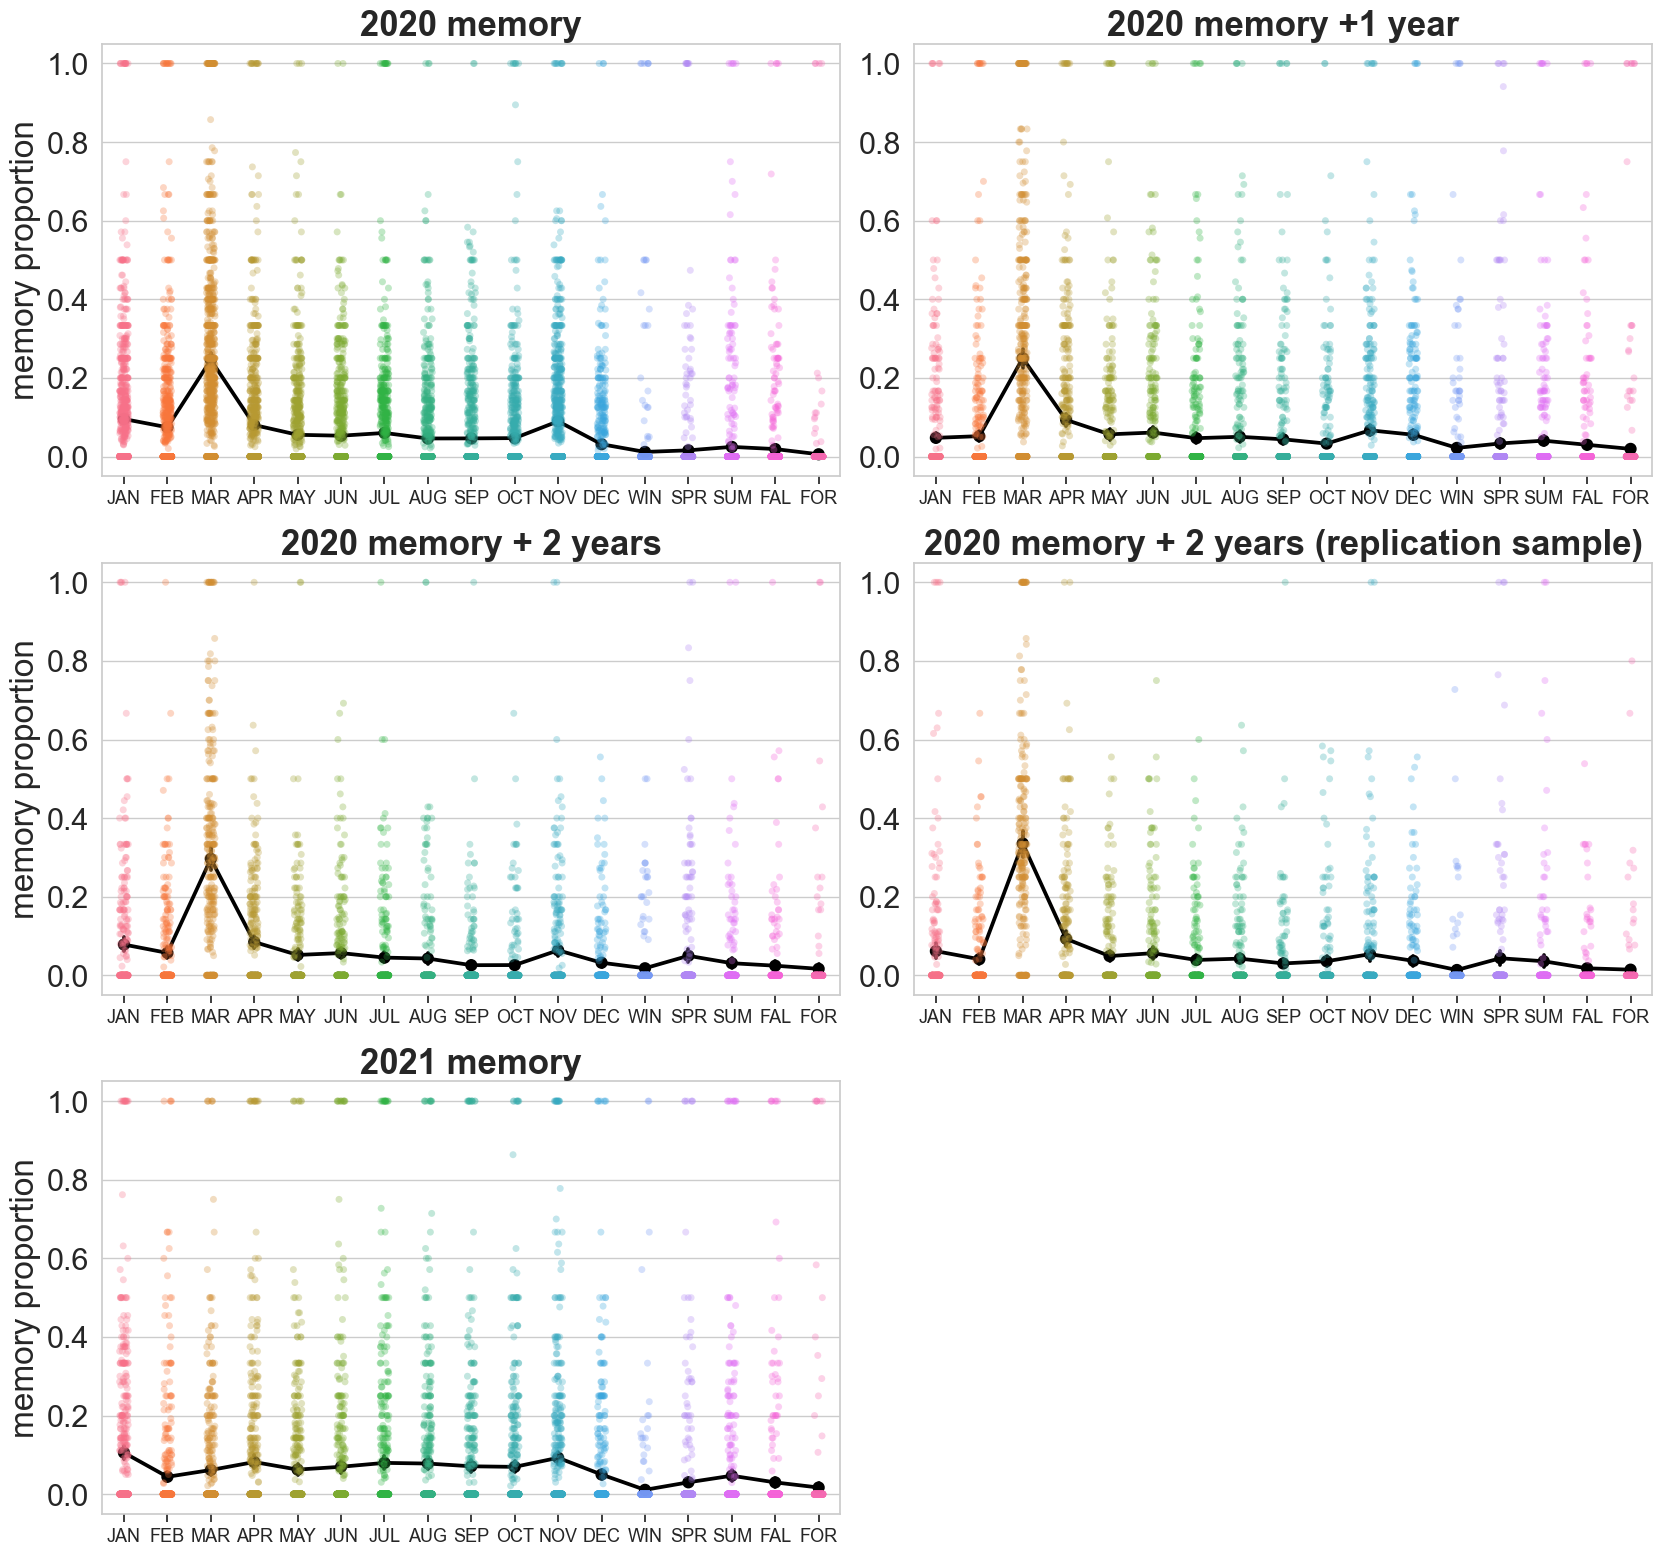

In [215]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(nrows = 3, ncols=2, figsize=(20,15))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.1)
sns.set_theme(style="whitegrid", font_scale=2, rc={'xtick.bottom': True})

# Remove the last subplot
fig.delaxes(ax6)

# 2020 
p1 = sns.stripplot(x="datePlot", y="memProp",alpha=0.3, hue="datePlot",
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","WIN","SPR","SUM","FAL","FOR"],
                hue_order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","WIN","SPR","SUM","FAL","FOR"],
                palette="husl",legend=False,                
                data=sd_2020A, ax = ax1)
p1 = sns.pointplot(x="datePlot", y="memProp",  color="black",
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","WIN","SPR","SUM","FAL","FOR"],
                data=sd_2020A,  ax = ax1)
p1.set_title('2020 memory',fontdict= { 'fontsize': 25, 'fontweight':'bold'})
p1.set_xlabel("");
p1.set_ylabel("memory proportion");
plt.setp(ax1.get_xticklabels(), fontsize=13);

# 2020 +1
p2 = sns.stripplot(x="datePlot", y="memProp",alpha=0.3, hue="datePlot",
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","WIN","SPR","SUM","FAL","FOR"],
                hue_order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","WIN","SPR","SUM","FAL","FOR"],
                palette="husl",legend=False,                
                data=sd_2020_p1A, ax = ax2)
p2 = sns.pointplot(x="datePlot", y="memProp",  color="black",
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","WIN","SPR","SUM","FAL","FOR"],
                data=sd_2020_p1A,  ax = ax2)
p2.set_title('2020 memory +1 year',fontdict= { 'fontsize': 25, 'fontweight':'bold'})
p2.set_xlabel("");
p2.set_ylabel("");
plt.setp(ax2.get_xticklabels(), fontsize=13);

# 2020 +2 years
p3 = sns.stripplot(x="datePlot", y="memProp",alpha=0.3, hue="datePlot",
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","WIN","SPR","SUM","FAL","FOR"],
                hue_order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","WIN","SPR","SUM","FAL","FOR"],
                palette="husl",legend=False,                
                data=sd_2020_p2A, ax = ax3)
p3 = sns.pointplot(x="datePlot", y="memProp",  color="black",
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","WIN","SPR","SUM","FAL","FOR"],
                data=sd_2020_p2A,  ax = ax3)
p3.set_title('2020 memory + 2 years',fontdict= { 'fontsize': 25, 'fontweight':'bold'})
p3.set_xlabel("");
p3.set_ylabel("memory proportion");
plt.setp(ax3.get_xticklabels(), fontsize=13);

# 2020 +2 years rep
p4 = sns.stripplot(x="datePlot", y="memProp",alpha=0.3, hue="datePlot",
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","WIN","SPR","SUM","FAL","FOR"],
                hue_order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","WIN","SPR","SUM","FAL","FOR"],
                palette="husl",legend=False,                
                data=sd_2020_p2_rA, ax = ax4)
p4 = sns.pointplot(x="datePlot", y="memProp",  color="black",
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","WIN","SPR","SUM","FAL","FOR"],
                data=sd_2020_p2_rA,  ax = ax4)
p4.set_title('2020 memory + 2 years (replication sample)',fontdict= { 'fontsize': 25, 'fontweight':'bold'})
p4.set_xlabel("");
p4.set_ylabel("");
plt.setp(ax4.get_xticklabels(), fontsize=13);

# 2021
p5 = sns.stripplot(x="datePlot", y="memProp",alpha=0.3, hue="datePlot",
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","WIN","SPR","SUM","FAL","FOR"],
                hue_order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","WIN","SPR","SUM","FAL","FOR"],
                palette="husl",legend=False,                
                data=sd_2021A, ax = ax5)
p5 = sns.pointplot(x="datePlot", y="memProp",  color="black",
                order = ["JAN","FEB","MAR","APR","MAY","JUN","JUL","AUG","SEP","OCT","NOV","DEC","WIN","SPR","SUM","FAL","FOR"],
                data=sd_2021A,  ax = ax5)
p5.set_title('2021 memory',fontdict= { 'fontsize': 25, 'fontweight':'bold'})
p5.set_xlabel("");
p5.set_ylabel("memory proportion");
plt.setp(ax5.get_xticklabels(), fontsize=13);

## self-reported positive impact predicted further increases in march 2020 memory (SI Appendix Fig. S5)

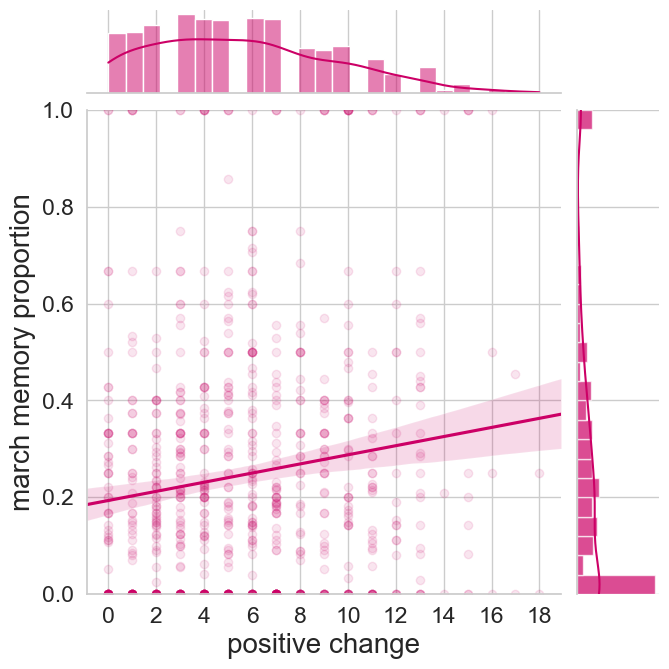

In [225]:
sns.set_theme(style="whitegrid",font_scale=1.5)
p1 = sns.jointplot(x="ps_pos", y="memProp_march", data=sub,
                  kind="reg", truncate=False, color='#cc0066', height=7,joint_kws = {'scatter_kws':dict(alpha=0.1)},marginal_kws=dict(bins=25))


for patch in p1.ax_marg_y.patches:
    patch.set_alpha(0.7) 

p1.ax_marg_y.set_ylim(0, 1)
p1.ax_joint.xaxis.set_major_locator(MaxNLocator(integer=True))
p1.set_axis_labels("positive change","march memory proportion",fontsize=20);
plt.savefig('figExp.pdf',bbox_inches='tight')